<a href="https://colab.research.google.com/github/31grudnia/Deep-Learning-Projects/blob/2-MNIST-Digit-Classification/DL_2_MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**



# **Imports and Preparation**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(31)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() # data is already sorted into train, test by keras API
type(X_train)

11490434/11490434 [==============================] - 0s 0us/step


numpy.ndarray

In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data --> 60k images

Testing data --> 10k images



---



Image dimension --> 28x28

Grayscale Image --> 1 channel

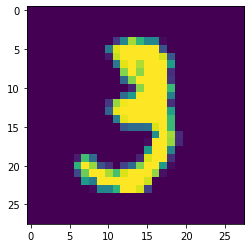

3


In [4]:
# printing 10th image

# print(X_train[10])
# print(X_train[10].shape)
plt.imshow(X_train[10])
plt.show()

# printing corresponding label
print(Y_train[10])

**Image Labels**

In [5]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [6]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


**ONE HOT ENCODING MIGHT BE DONE**

**GOOD TO TEST**

In [7]:
# scaling values

X_train = X_train/255
X_test = X_test/255

# if dividing by 255 max val. is 1 and min val. is 0 

# **Neural Network**

In [8]:
# setting up layers of NN

model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (28, 28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])

In [11]:
# compiling NN

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [12]:
# training NN

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2915 - accuracy: 0.9167
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1316 - accuracy: 0.9612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0972 - accuracy: 0.9704
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0755 - accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0627 - accuracy: 0.9797
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0533 - accuracy: 0.9832
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0473 - accuracy: 0.9851
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0400 - accuracy: 0.9874
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0367 - accuracy: 0.9879
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.033

**Accuracy on Testing data**

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.1315 - accuracy: 0.9654


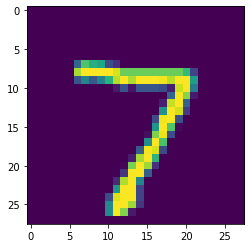

7


In [14]:
plt.imshow(X_test[0])
plt.show()
print(Y_test[0])

In [15]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)

313/313 [==============================] - 1s 4ms/step
(10000, 10)


In [16]:
print(Y_pred[0])

[1.7467730e-02 3.4905458e-03 4.1649342e-02 9.7175163e-01 9.6883232e-06
 6.9715097e-05 8.0950331e-09 9.9999917e-01 2.9183726e-03 1.4285565e-02]


In [18]:
# converting prediction probabilities for class/case label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [19]:
# converting prediction probabilities to class/case label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 1, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 3, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 7, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 4, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

# **Confusin Matrix**

In [20]:
conf_mtrx = confusion_matrix(Y_test, Y_pred_labels)

In [21]:
print(conf_mtrx)

tf.Tensor(
[[ 966    1    0    2    3    2    3    1    1    1]
 [   0 1124    0    4    0    0    3    1    3    0]
 [   6    5  960   34   10    0    2    6    9    0]
 [   0    0    0 1002    1    1    1    1    2    2]
 [   0    1    0    0  968    1    3    2    1    6]
 [   2    0    0   32    1  842    7    3    4    1]
 [   5    2    0    1    9    4  937    0    0    0]
 [   1    6    6   14    3    0    0  990    1    7]
 [   4    1    2   42    6    2    5    4  904    4]
 [   4    3    0   18   13    1    1    7    1  961]], shape=(10, 10), dtype=int32)


Text(0.5, 42.0, 'Predicted Labels')

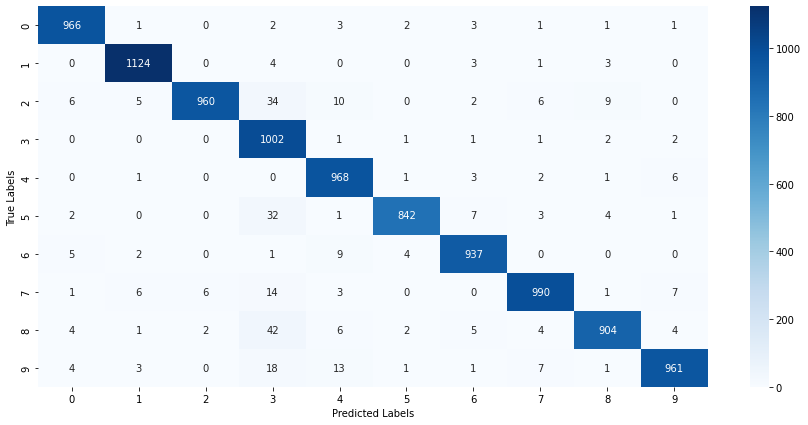

In [22]:
plt.figure(figsize=(15, 7))
sns.heatmap(conf_mtrx, annot=True, fmt='d', cmap='Blues')
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

# **Building predictive system**

In [23]:
# getting an image using web get

!wget 'https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67'

--2023-03-21 22:40:12--  https://camo.githubusercontent.com/3d9666a8f0c5658667292b74ca19295827c2b22a0e903db283998ae213e6f6e1/68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67
Resolving camo.githubusercontent.com (camo.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to camo.githubusercontent.com (camo.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3225 (3.1K) [image/png]
Saving to: ‘68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67’

68747470733a2f2f646 100%[===================>]   3.15K  --.-KB/s    in 0s      

2023-03-21 22:40:13 (37.1 MB/s) - ‘68747470733a2f2f646174616d61646e6573732e6769746875622e696f2f6173736574732f696d616765732f74665f66696c655f666565642f4d4e4953545f64696769742e706e67’ s

In [24]:
input_image_path = '/content/testing_img'

input_image = cv2.imread(input_image_path)

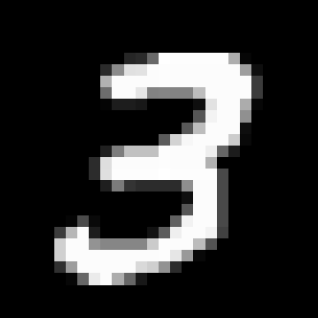

In [25]:
cv2_imshow(input_image)

In [26]:
input_image.shape

(318, 318, 3)

In [27]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
grayscale.shape

(318, 318)

In [30]:
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize.shape
cv2_imshow(input_image_resize)

In [31]:
type(input_image_resize)

numpy.ndarray

In [32]:
input_image_resize = input_image_resize/255

In [33]:
image_reshaped = np.reshape(input_image_resize, [1, 28, 28]) # it is needed IDK why exactly but first dgit is number of images we want to predict and another two digits are size and there might be last one for rgb img like [1, 28, 28, 3]

In [36]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 41ms/step
[[3.7912640e-10 1.0821631e-03 2.1210205e-06 1.0000000e+00 8.7467485e-15
  1.1452246e-08 1.4602541e-19 1.3050795e-04 1.5413672e-04 3.4082675e-06]]


In [38]:
input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

3


**All in one for user**

Path of the image to be predicted: /content/testing_img


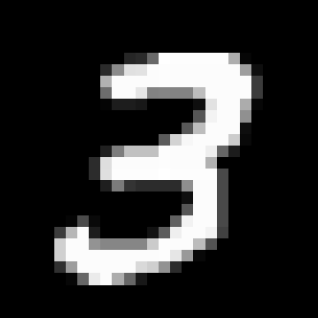

1/1 [==============================] - 0s 26ms/step
The Handwritten Digit is recognised as  3


In [39]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)